In [1]:
a = 10

g(b,c,d)=b+c+d

println(g(1,2,3))

6


In [2]:
import Pkg
Pkg.add("Plots")

   Resolving package versions...
  No Changes to `~/.julia/environments/v1.10/Project.toml`
  No Changes to `~/.julia/environments/v1.10/Manifest.toml`


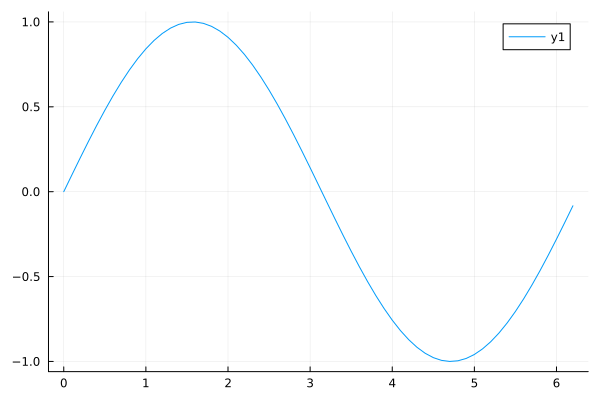

In [3]:
# PLotting sin function
using Plots
x = 0:0.1:2*pi
y = sin.(x)
plot(x,y)


## Plot function
- It seems that jupyter plot doesn't accept plotting simgle points, by default.
- Plot(y) gives number list plot. (y::list)
- Plot(x,y) normal plot. (x,y::list)

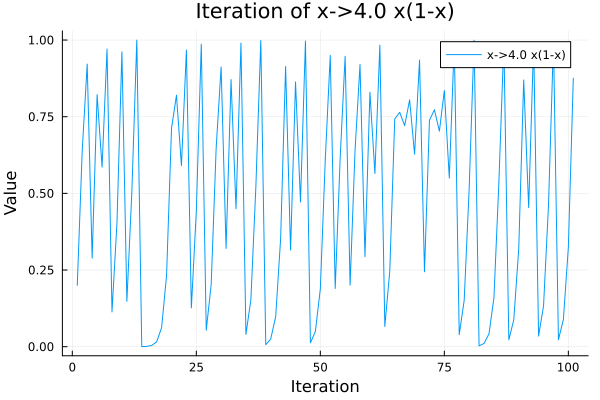

In [4]:
# Plot iteration of map x->3x(1-x)
r = 4.0
f(x) = r*x*(1-x)

iterator = 0.2
values = [iterator]
for i in 1:100
    iterator = f(iterator)
    push!(values, iterator)
end

plot(values, label="x->$r x(1-x)", title="Iteration of x->$r x(1-x)", xlabel="Iteration", ylabel="Value")

## Data Fitting

In [5]:
xdata = [ 15.2; 19.9;2.2; 11.8; 12.1; 18.1; 11.8; 13.4; 11.5;0.5;18.0; 10.2; 10.6; 13.8;4.6;3.8; 15.1; 15.1; 11.7;4.2 ];
ydata = [ 0.73; 0.19; 1.54; 2.08; 0.84; 0.42; 1.77; 0.86; 1.95; 0.27;0.39; 1.39; 1.25; 0.76; 1.99; 1.53; 0.86; 0.52; 1.54; 1.05 ];

In [6]:
import Pkg
Pkg.add("LsqFit")

   Resolving package versions...
  No Changes to `~/.julia/environments/v1.10/Project.toml`
  No Changes to `~/.julia/environments/v1.10/Manifest.toml`


In [7]:
using LsqFit
@. model(x, p) = real(p[1]*(x/p[2])*exp(-(x/p[2]+0im)^p[3]))
p0 = [1.0, 1.0, 2.0]
fit = curve_fit(model, xdata, ydata, p0)

LsqFit.LsqFitResult{Vector{Float64}, Vector{Float64}, Matrix{Float64}, Vector{Float64}, Vector{LsqFit.LMState{LsqFit.LevenbergMarquardt}}}([4.748982067890865, 9.831266326269144, 1.8938402898548161], [0.019254851332876854, 0.024680169386335993, -0.5378794683858785, -0.692500597253892, 0.48817380086659024, -0.05526678323532208, -0.38250059725389196, 0.21243954669333653, -0.5036997203050666, -0.02933111377582409, -0.015053226175318513, 0.29628923082323433, 0.3660276168292771, 0.236374596812148, -0.2373829465919226, 0.025973399195796, -0.09426852623190662, 0.24573147376809334, -0.13282547991294158, 0.6114574724896251], [0.15777167414195412 0.25320303781273207 -0.7451160636307831; 0.0452055127420635 0.135381546151758 -0.5755077257162905; … ; 0.2963107672202242 0.2337547039207008 -0.34047049955158415; 0.34985549508173774 -0.10506594025391877 0.2822577059641114], true, Iter     Function value   Gradient norm 
------   --------------   --------------
, Float64[])

In [8]:
println(fit.param)
sigma = stderror(fit)
# to get margin of error and confidence interval of each parameter at 5% significance level:
# margin_of_error = margin_error(fit, 0.05)
# confidence_inter = confidence_interval(fit; level=0.95)
# cov = estimate_covar(fit)
println(sigma)

[4.748982067890865, 9.831266326269144, 1.8938402898548161]
[0.45164713858698, 1.3113138790105467, 0.47898464476008584]


**Results**

$\beta_1 = 4.75\pm 0.45,\beta_2 = 9.8 \pm 1.3,\beta_3 = 1.89 \pm 0.48$

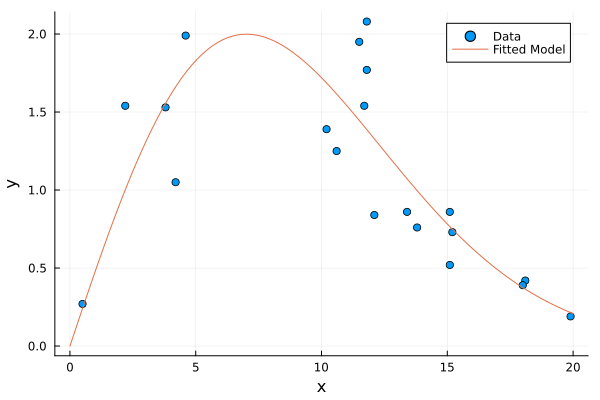

In [9]:
# Plotting the data and the fitted model
scatter(xdata, ydata, label="Data")

x = range(0, stop=20, length=100)
y = real.(model(x, fit.param))
plot!(x, y, label="Fitted Model",xlabel="x", ylabel="y")

## Determinant Value ill-conditioned

In [10]:
using LinearAlgebra

Mat_test = [1 2 3; 4 7 6; 7 8 9]
Mat_inv = inv(Mat_test)
Mat_trace = tr(Mat_test)

println("Trace of the matrix: ", Mat_trace)
println("Inverse of the matrix: ", Mat_inv)

# compute matrix modulus
Mat_mod = norm(Mat_test)
println("Modulus of the matrix: ", Mat_mod)

Trace of the matrix: 17
Inverse of the matrix: [-0.6249999999999999 -0.24999999999999997 0.37499999999999994; -0.25000000000000017 0.5 -0.24999999999999997; 0.7083333333333334 -0.25000000000000006 0.041666666666666685]
Modulus of the matrix: 17.578395831246947


### Random matrix generation

If we restrict matrix spectral conditional number to b3 $c$, singular values will span (c,1).

The random generated matrix:

\begin{equation}
    P_{\mu\nu} = E_\mu^i F_\nu^j \Sigma_{ij}
\end{equation}

Where, $\vec{E^i}$ and $\vec{F^i}$ are random orthorgonal basis of linear space, and $\Sigma$ is ranodm diagonal matrix.

In [11]:
using Random
Random.seed!(1234)

@.fit01(x,lowbound,highbound) = x*lowbound + (1-x)*highbound

function Sigma_gen(n,c)
    if n >2
        random_floats = rand(n-2)
        # sort the random floats
        sort!(random_floats)
        # add 0 and 1 to the array
        pushfirst!(random_floats, 0)
        push!(random_floats, 1)
        # refit the random floats to the desired range
        random_floats = c > 1 ? fit01.(random_floats, 1, c) : fit01.(random_floats, c, 1)
        # get the desired diagnol matrix
        Sigma = Diagonal(random_floats)
    elseif n == 2
        Sigma = c > 1 ? Diagonal([1,c]) : Diagonal([c,1])
    else
        # error message
        println("n must be greater than 1")
    end
    return Sigma
end

Sigma_gen (generic function with 1 method)

In [12]:
Sigma_gen(4, 0.5)

4×4 Diagonal{Float64, Vector{Float64}}:
 1.0   ⋅         ⋅         ⋅ 
  ⋅   0.837012   ⋅         ⋅ 
  ⋅    ⋅        0.725474   ⋅ 
  ⋅    ⋅         ⋅        0.5

In [13]:
# generate random orthogonal matrix
function Ortho_gen(n)
    # generate random matrix
    A = rand(n,n)::Array{Float64,2}
    # get the QR decomposition
    Q, R = qr(A)
    return Q
end

Ortho_gen (generic function with 1 method)

In [14]:
E = Ortho_gen(3)
E'*E

3×3 Matrix{Float64}:
  1.0          1.11022e-16  -1.11022e-16
  5.20417e-17  1.0           0.0
 -1.11022e-16  0.0           1.0

In [15]:
function mat_gen(n,c)
    # generate random orthogonal matrix
    E = Ortho_gen(n)
    F = Ortho_gen(n)
    # generate random diagonal matrix
    Sigma = Sigma_gen(n,c)
    # generate the random matrix
    A = E*Sigma*F'
    return A
end

mat_gen (generic function with 1 method)

In [16]:
mat_gen(3, 0.5)

3×3 Matrix{Float64}:
  0.40852   0.728875    0.179544
 -0.398608  0.486121   -0.0965472
  0.111225  0.0784578   0.85254

In [17]:
# check matrix spectral norm
function spectral_norm(A)
    # get the singular value decomposition
    U, S, V = svd(A)
    # get the spectral norm
    return S[1]
end

function spectral_conditional_number(A)
    # get the singular value decomposition
    U, S, V = svd(A)
    # get the spectral norm
    return S[1]/S[end]
end

function Frobenius_norm(A)
    return norm(A)
end

function Frobenius_conditional_number(A)
    return norm(A)*norm(inv(A))
end

Frobenius_conditional_number (generic function with 1 method)

In [18]:
A = mat_gen(3, 0.01)
spectral_conditional_number(A)

100.00000000000007

## Testing of Matrix Norms and Conditional number

In [1]:
A = mat_gen(3, 0.5)
sc = spectral_conditional_number(A)
fc =Frobenius_conditional_number(A)

print(sc,';',fc)

UndefVarError: UndefVarError: `mat_gen` not defined

In [ ]:
# test